In [27]:
def calculate_median(array): 
    
    sorted_array = np.sort(array) 
   
    median = sorted_array[len(array)//2] 
    return median

def psnr(img1, img2): 
  

  
    img1 = img1.astype(np.float64) / 255. 
    img2 = img2.astype(np.float64) / 255. 
    mse = np.mean((img1 - img2) ** 2) 
    if(mse == 0): 
        return 100
    else : 
        max_pixel = 1.0
 
        psnr = 10 * np.log10(max_pixel /mse)
    return print('implementation: ', psnr)

In [28]:
def admf(image, initial_window, max_window): 
  
    xlength, ylength = image.shape 
    
    z_min, z_med, z_max, z_xy = 0, 0, 0, 0 
    
    S_max = max_window                              
    
    S_xy = initial_window      
    
    output_image = image.copy()
    
    for row in range(S_xy, xlength-S_xy-1): 
        for col in range(S_xy, ylength-S_xy-1): 
            
            filter_window = image[row - S_xy : row + S_xy + 1, col - S_xy : col + S_xy + 1]  
            
            target = filter_window.reshape(-1)  
            z_min = np.min(target)
            z_max = np.max(target)
            z_med = calculate_median(target) 
            z_xy = image[row, col] 
            
             
            new_intensity = level_B(z_min, z_med, z_max, z_xy, S_xy, S_max) 
            output_image[row, col] = new_intensity 
    return output_image



def calculate_median(array): 
    
    sorted_array = np.sort(array) 
    
    median = sorted_array[len(array)//2] 
    return median



def level_B(z_min, z_med, z_max, z_xy, S_xy, S_max): 
    if(z_min < z_xy < z_max): 
        return z_xy
    else:                     
        return level_C(z_min, z_med, z_max, z_xy, S_xy, S_max)   
    
    
def level_C(z_min, z_med, z_max, z_xy, S_xy, S_max):
    if(z_min < z_med < z_max):
        return z_med
    else:
        S_xy += 2 
        if(S_xy <= S_max): #repeat process 
            return level_B(z_min, z_med, z_max, z_xy, S_xy, S_max)
        else: 
            return z_med   

        

    


implementation:  18.519746398979883
None
implementation:  22.239582032437934
None


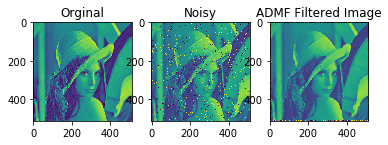

In [30]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from skimage.util import random_noise

'
img = cv2.imread('lena512color.tiff',0) 
 
noise_img = random_noise(img, mode="s&p",amount=0.05) 

img_noisy1 = np.array(255*noise_img, dtype = 'uint8')

admf_output = admf(img_noisy1, 3, 11)


noisy_psnr=psnr(img,img_noisy1) 
print(noisy_psnr)
denoised_psnr =psnr(img,amf_output) 
print(denoised_psnr)


plt.subplot(1,3,1) 
plt.imshow(img) 
plt.title('Orginal') 
plt.subplot(1,3,2) 
plt.imshow(img_noisy1) 
plt.title('Noisy') 
plt.subplot(1,3,3) 
plt.imshow(amf_output) 
plt.title('ADMF Filtered Image') 
plt.show()